In [37]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Uni-Variate Forecasting

In [39]:
df_test=pd.read_csv("Desktop\DS\Other datasets\\DailyDelhiClimateTest.csv")
df_train=pd.read_csv("Desktop\DS\Other datasets\\DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [40]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

In [41]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)
  
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550286,3.421892,3.682916
1571,2017-04-21,3.554056,3.427520,3.677443
1572,2017-04-22,3.554335,3.426082,3.678417
1573,2017-04-23,3.553704,3.427507,3.680428
1574,2017-04-24,3.570968,3.450721,3.705457


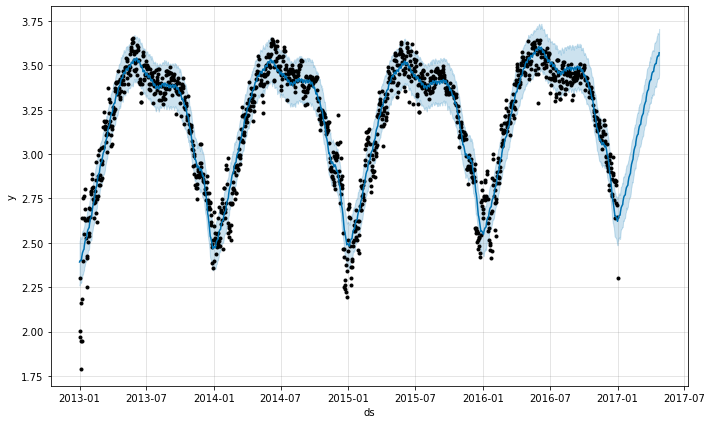

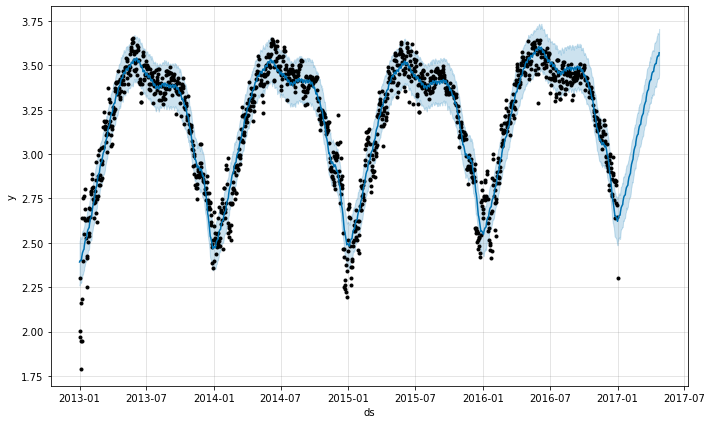

In [43]:
model.plot(forecast_data)

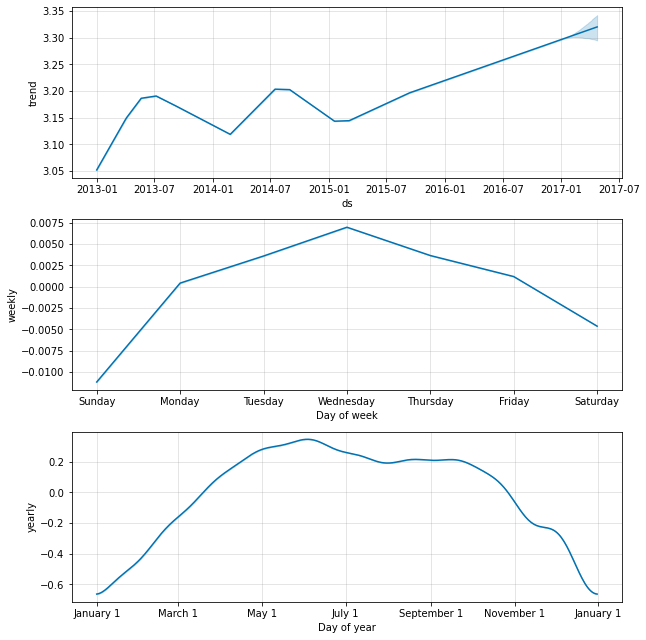

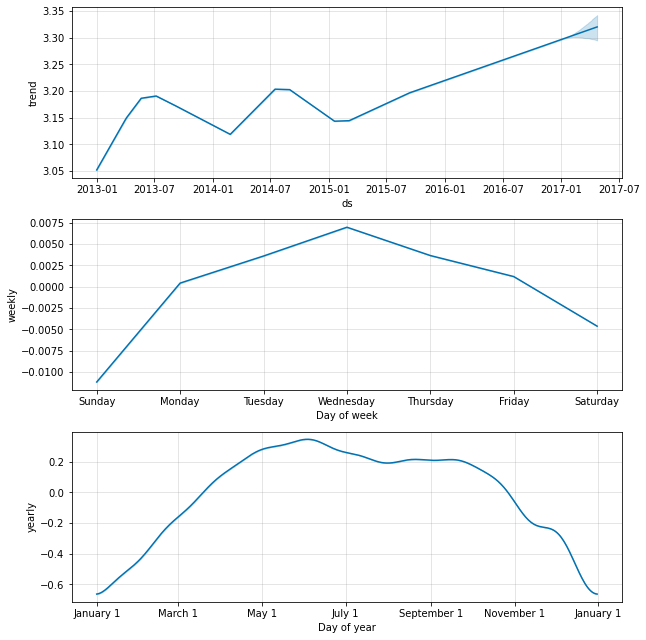

In [44]:
model.plot_components(forecast_data)

In [45]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

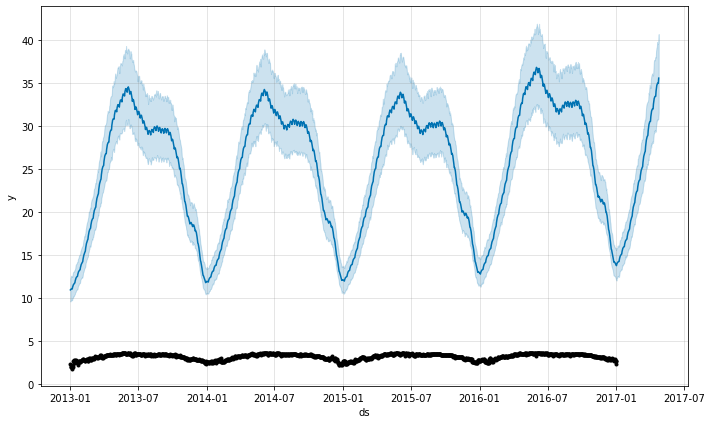

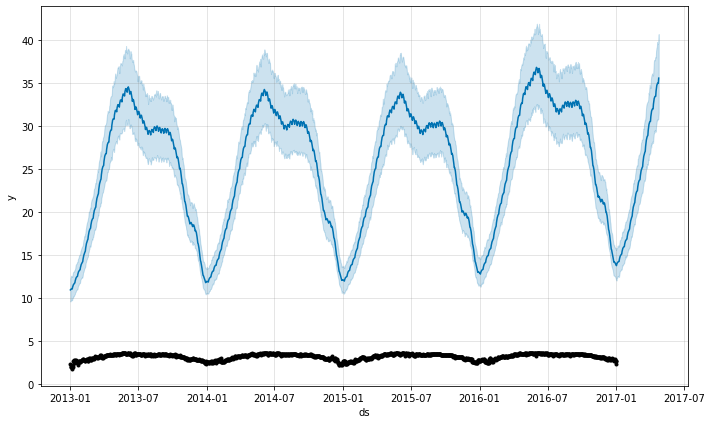

In [46]:
model.plot(forecast_data_orig)

In [47]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [48]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [49]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [50]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.296636,12.331941,15.794356,3.296636,3.296636,-0.661769,-0.661769,-0.661769,0.000417,0.000417,0.000417,-0.662186,-0.662186,-0.662186,0.0,0.0,0.0,13.941459
1463,2017-01-03,3.296845,12.324211,15.814155,3.296845,3.296845,-0.655749,-0.655749,-0.655749,0.003584,0.003584,0.003584,-0.659333,-0.659333,-0.659333,0.0,0.0,0.0,14.028580
1464,2017-01-04,3.297054,12.542512,16.075816,3.297054,3.297054,-0.648401,-0.648401,-0.648401,0.006953,0.006953,0.006953,-0.655354,-0.655354,-0.655354,0.0,0.0,0.0,14.134993
1465,2017-01-05,3.297264,12.486810,15.999143,3.297264,3.297264,-0.646736,-0.646736,-0.646736,0.003641,0.003641,0.003641,-0.650377,-0.650377,-0.650377,0.0,0.0,0.0,14.161502
1466,2017-01-06,3.297473,12.500110,16.012879,3.297473,3.297473,-0.643353,-0.643353,-0.643353,0.001182,0.001182,0.001182,-0.644536,-0.644536,-0.644536,0.0,0.0,0.0,14.212462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319228,30.627315,39.762191,3.295808,3.340024,0.231059,0.231059,0.231059,0.003641,0.003641,0.003641,0.227418,0.227418,0.227418,0.0,0.0,0.0,34.823286
1571,2017-04-21,3.319437,30.800153,39.545158,3.295604,3.340548,0.234619,0.234619,0.234619,0.001182,0.001182,0.001182,0.233437,0.233437,0.233437,0.0,0.0,0.0,34.954809
1572,2017-04-22,3.319646,30.755915,39.583688,3.295367,3.341014,0.234689,0.234689,0.234689,-0.004622,-0.004622,-0.004622,0.239310,0.239310,0.239310,0.0,0.0,0.0,34.964550
1573,2017-04-23,3.319855,30.799772,39.663373,3.294990,3.341479,0.233849,0.233849,0.233849,-0.011155,-0.011155,-0.011155,0.245004,0.245004,0.245004,0.0,0.0,0.0,34.942506


In [51]:
rows = final_df["yhat"].tail(113)

In [52]:
rows = rows.reset_index()

In [53]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

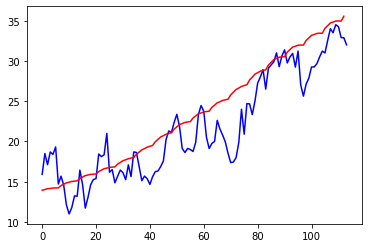

In [54]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()

# Multi-Variate Forecasting

In [21]:
df_test=pd.read_csv("Desktop\DS\Other datasets\\DailyDelhiClimateTest.csv")
df_train=pd.read_csv("Desktop\DS\Other datasets\\DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [22]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [23]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [25]:
df=df.append(df_test)
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [26]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [27]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.574128,3.471346,3.686470
1572,2017-04-21,3.522571,3.410417,3.635216
1573,2017-04-22,3.518493,3.410772,3.622982
1574,2017-04-23,3.578084,3.470810,3.691685
1575,2017-04-24,3.588962,3.478931,3.699681


In [28]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.040348,2.243752,2.463193,3.040348,3.040348,-0.687481,-0.687481,-0.687481,-0.102718,...,0.009656,0.009656,0.009656,-0.587429,-0.587429,-0.587429,0.0,0.0,0.0,2.352867
1,2013-01-02,3.041418,2.207201,2.426617,3.041418,3.041418,-0.723082,-0.723082,-0.723082,-0.142473,...,0.005426,0.005426,0.005426,-0.584265,-0.584265,-0.584265,0.0,0.0,0.0,2.318336
2,2013-01-03,3.042488,2.233490,2.444541,3.042488,3.042488,-0.702441,-0.702441,-0.702441,-0.121155,...,0.003079,0.003079,0.003079,-0.579829,-0.579829,-0.579829,0.0,0.0,0.0,2.340047
3,2013-01-04,3.043559,2.323336,2.540577,3.043559,3.043559,-0.616134,-0.616134,-0.616134,-0.042145,...,0.007905,0.007905,0.007905,-0.574269,-0.574269,-0.574269,0.0,0.0,0.0,2.427425
4,2013-01-05,3.044629,2.250392,2.467429,3.044629,3.044629,-0.685723,-0.685723,-0.685723,-0.119024,...,0.004404,0.004404,0.004404,-0.567743,-0.567743,-0.567743,0.0,0.0,0.0,2.358905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.308513,3.471346,3.686470,3.293568,3.324959,0.265615,0.265615,0.265615,0.159378,...,0.001760,0.001760,0.001760,0.107694,0.107694,0.107694,0.0,0.0,0.0,3.574128
1572,2017-04-21,3.308712,3.410417,3.635216,3.293553,3.325393,0.213858,0.213858,0.213858,0.101161,...,-0.000228,-0.000228,-0.000228,0.112418,0.112418,0.112418,0.0,0.0,0.0,3.522571
1573,2017-04-22,3.308911,3.410772,3.622982,3.293404,3.325814,0.209582,0.209582,0.209582,0.091191,...,-0.002964,-0.002964,-0.002964,0.117347,0.117347,0.117347,0.0,0.0,0.0,3.518493
1574,2017-04-23,3.309110,3.470810,3.691685,3.293312,3.326579,0.268973,0.268973,0.268973,0.153105,...,-0.004486,-0.004486,-0.004486,0.122431,0.122431,0.122431,0.0,0.0,0.0,3.578084


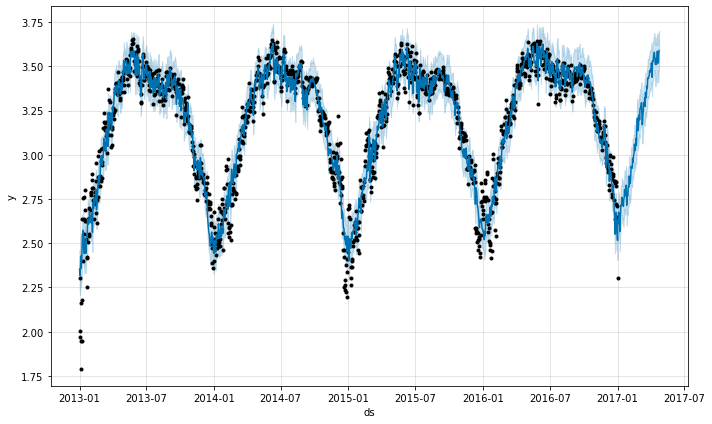

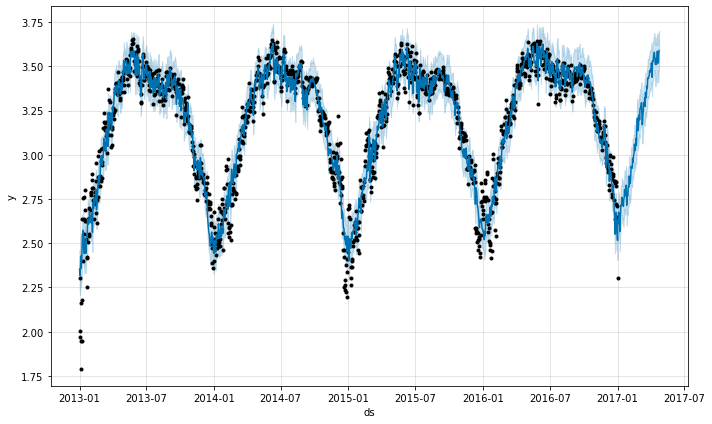

In [29]:
model_new.plot(forecast_data)

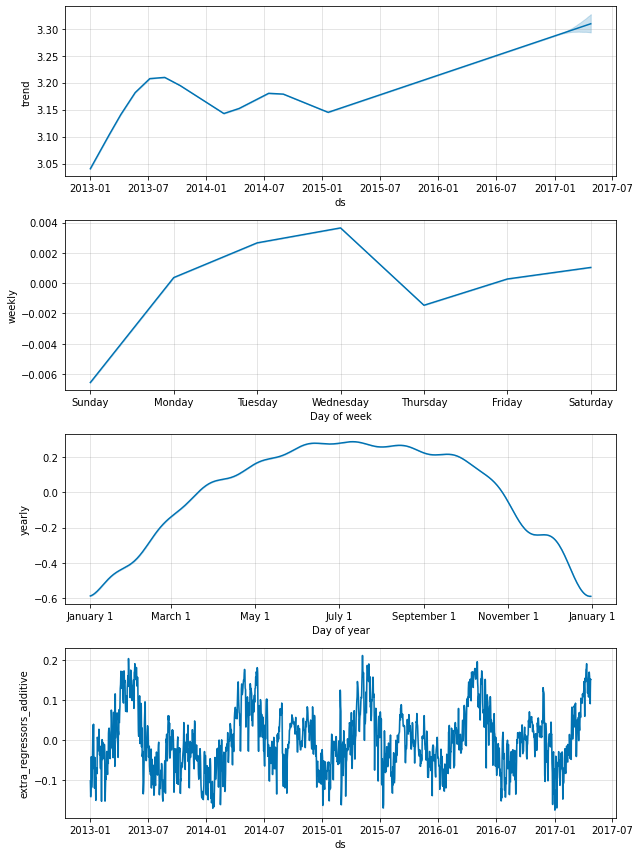

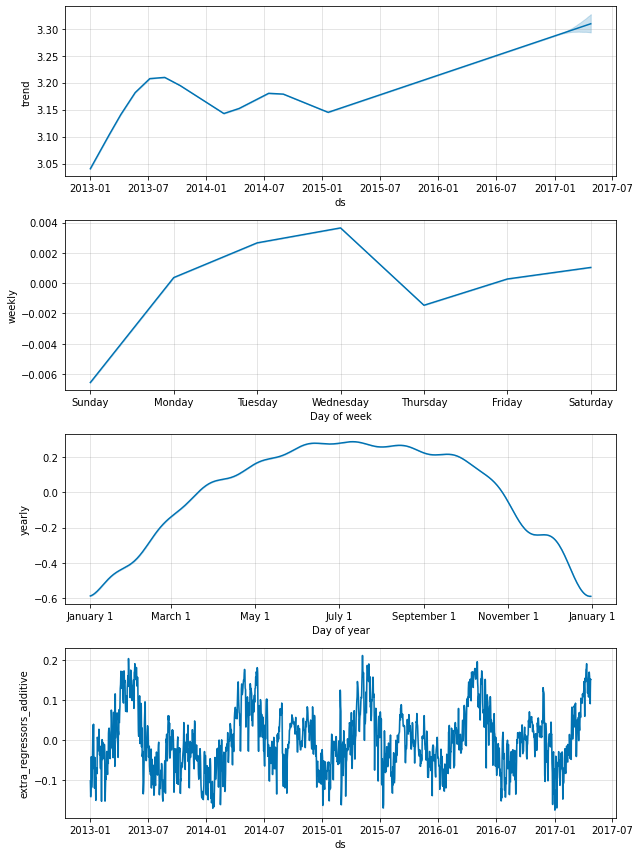

In [30]:
model_new.plot_components(forecast_data)

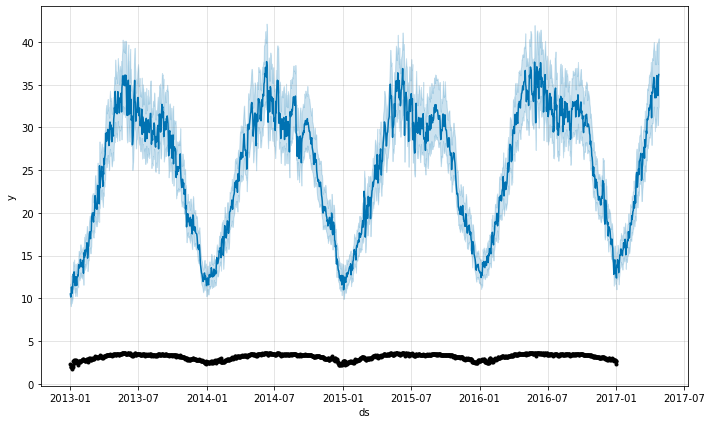

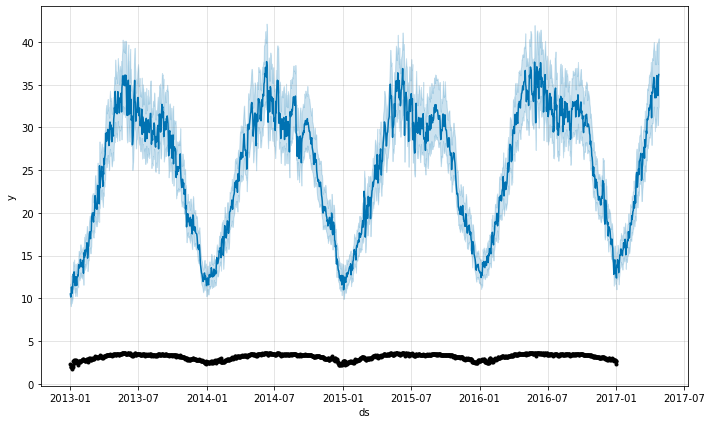

In [31]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [32]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [36]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'